# Plotly Interactive Visualizations in Python

In this lecture, we will explore how to create beautiful and interactive visualizations using **Plotly Express** and **Plotly Graph Objects** in Python. Plotly is a powerful graphing library that enables rich, interactive visualizations for data exploration and presentation.

---

## What You Will Learn

This notebook covers:

- Installing and importing Plotly
- Creating line, bar, and scatter plots with Plotly Express
- Customizing plots (layout, color, size)
- Creating subplot layouts
- Interacting with time series data
- Surface & 3D plots using Plotly Graph Objects

Let’s begin!


In [27]:
# If you haven't installed Plotly, uncomment below
# !pip install plotly

import pandas as pd
import numpy as np
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pio.renderers.default = 'jupyterlab'  # 'colab' or 'jupyterlab' depending on your environment


## Line Plot

Create simple line plots using Plotly Express.


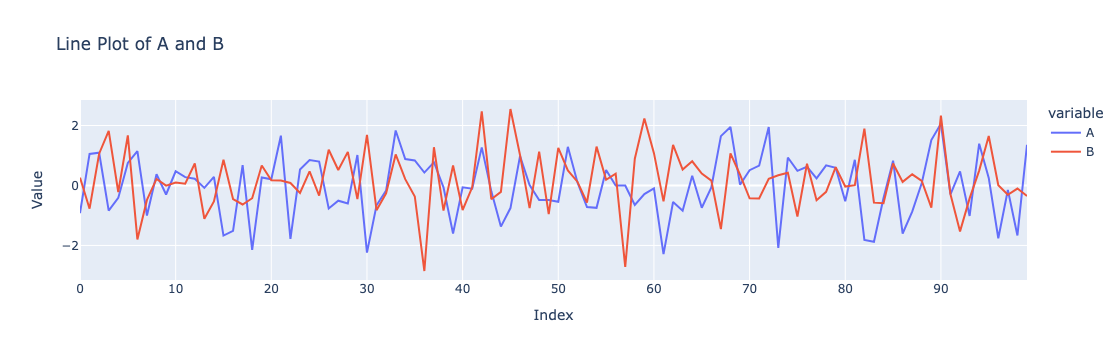

In [30]:
df = pd.DataFrame(np.random.randn(100, 2), columns=['A', 'B'])
df['Index'] = df.index

fig = px.line(df, x='Index', y=['A', 'B'], title="Line Plot of A and B", labels={'value': 'Value', 'Index': 'Index'})
fig.show()


## Bar Plot Example

Bar plots are useful for comparing quantities across categories.


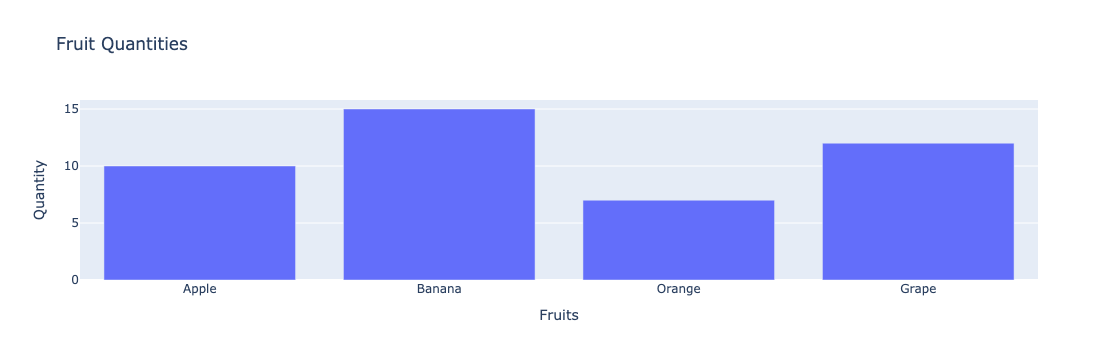

In [33]:
bar_data = pd.DataFrame({'Fruits': ['Apple', 'Banana', 'Orange', 'Grape'],
                         'Quantity': [10, 15, 7, 12]})

fig = px.bar(bar_data, x='Fruits', y='Quantity', title="Fruit Quantities")
fig.show()


## Scatter Plot Example

Scatter plots help us understand relationships between two continuous variables.


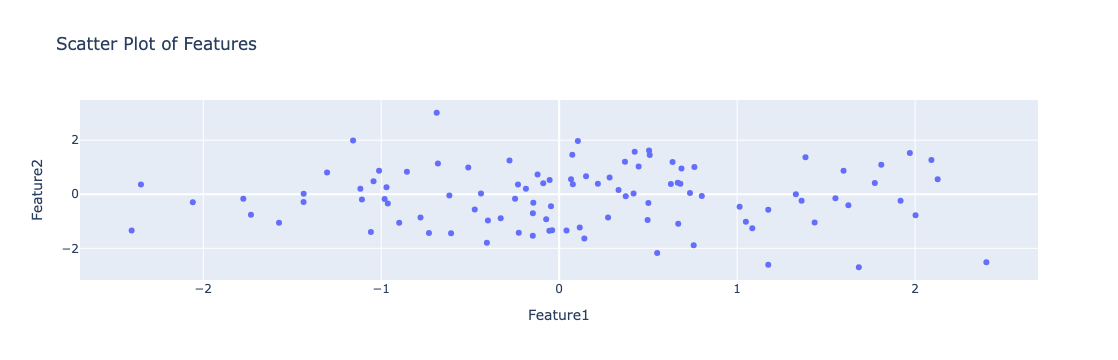

In [36]:
df = pd.DataFrame(np.random.randn(100, 2), columns=['Feature1', 'Feature2'])

fig = px.scatter(df, x='Feature1', y='Feature2', title='Scatter Plot of Features')
fig.show()


## Time Series Plot

Visualizing time series data interactively with Plotly Express.


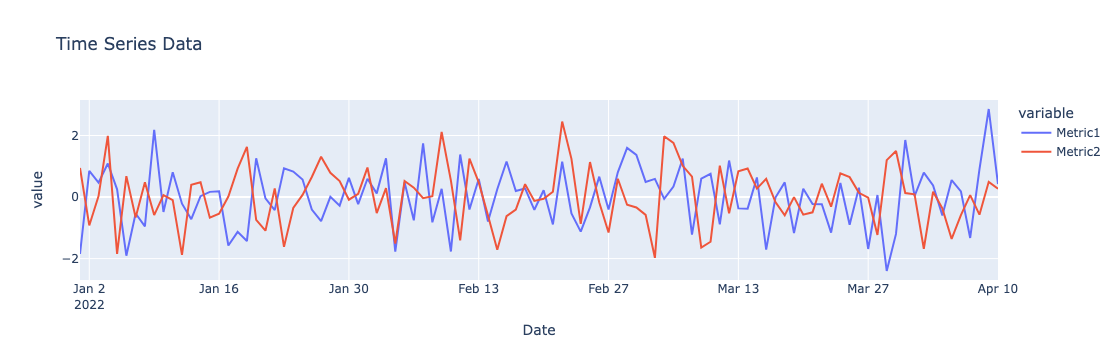

In [39]:
date_range = pd.date_range(start='2022-01-01', periods=100)
df = pd.DataFrame(np.random.randn(100, 2), index=date_range, columns=['Metric1', 'Metric2'])
df['Date'] = df.index

fig = px.line(df, x='Date', y=['Metric1', 'Metric2'], title='Time Series Data')
fig.show()


## Heatmap Example

Heatmaps are useful for visualizing matrix-style data.


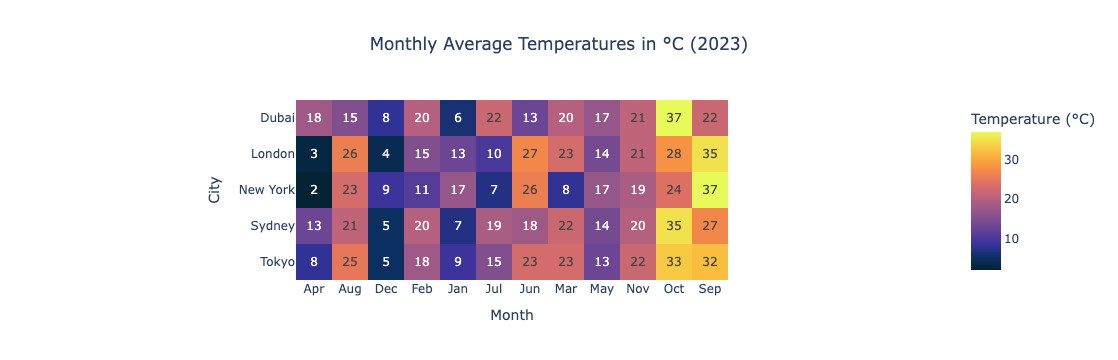

In [44]:
import pandas as pd
import plotly.express as px

# Monthly average temperatures (in °C) for 5 cities in 2023
temperature_data = {
    'City': ['New York', 'London', 'Tokyo', 'Sydney', 'Dubai']*12,
    'Month': sorted(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']*5),
    'Temperature': [
        2, 3, 8, 13, 18, 23, 26, 25, 21, 15, 9, 4,       # New York
        5, 5, 8, 11, 15, 18, 20, 20, 17, 13, 9, 7,        # London
        6, 7, 10, 15, 19, 22, 26, 27, 23, 18, 13, 8,      # Tokyo
        23, 23, 22, 20, 17, 14, 13, 14, 17, 19, 21, 22,   # Sydney
        20, 21, 24, 28, 33, 35, 37, 37, 35, 32, 27, 22    # Dubai
    ]
}

temp_df = pd.DataFrame(temperature_data)
heat_df = temp_df.pivot(index='City', columns='Month', values='Temperature')

fig = px.imshow(
    heat_df,
    labels=dict(x="Month", y="City", color="Temperature (°C)"),
    title="Monthly Average Temperatures in °C (2023)",
    text_auto=True,
    color_continuous_scale='thermal'
)
fig.update_layout(title_x=0.5)
fig.show()

## Subplots in Plotly

Create multiple charts in a single layout using Plotly Graph Objects.


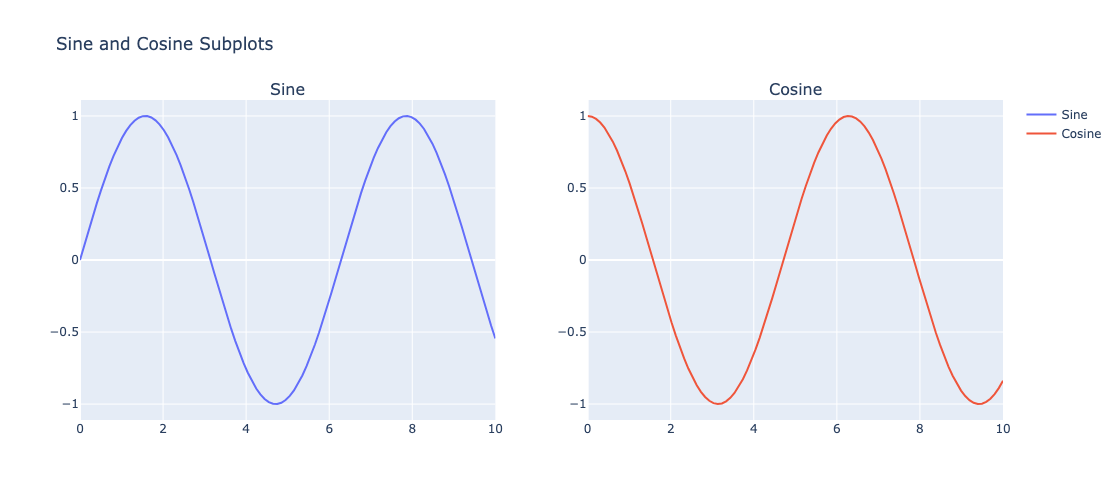

In [69]:
x = np.linspace(0, 10, 100)

fig = make_subplots(rows=1, cols=2, subplot_titles=["Sine", "Cosine"])

fig.add_trace(go.Scatter(x=x, y=np.sin(x), mode='lines', name='Sine'), row=1, col=1)
fig.add_trace(go.Scatter(x=x, y=np.cos(x), mode='lines', name='Cosine'), row=1, col=2)

fig.update_layout(title_text="Sine and Cosine Subplots",    width=1100,   # Set custom width
    height=500   # Set custom height
)
fig.show()


## Surface Plot Example

Great for visualizing 3D relationships and surfaces.


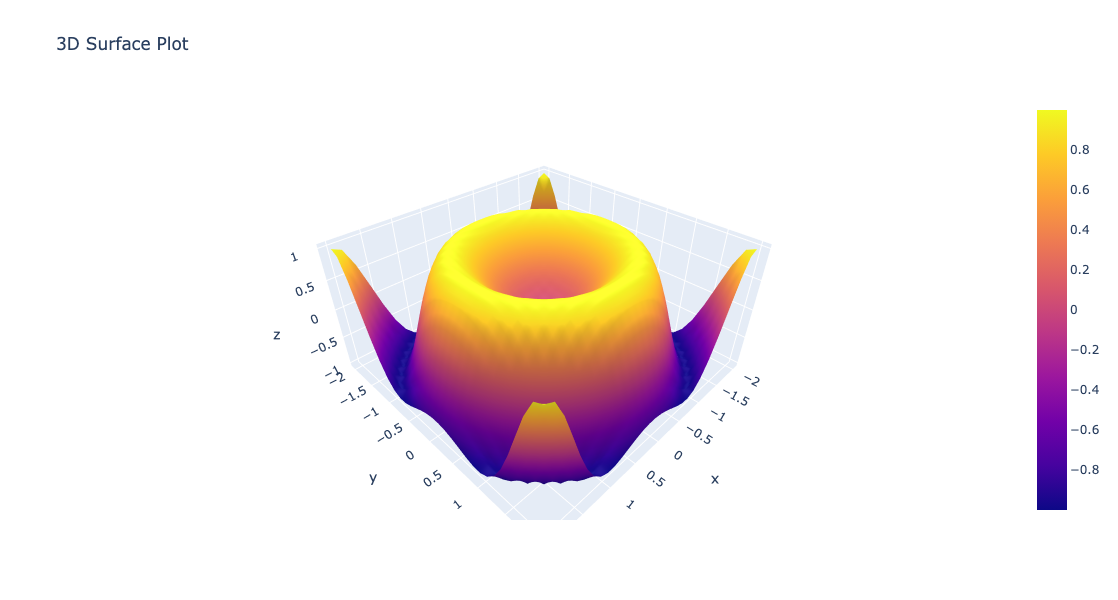

In [53]:

x = np.linspace(-2, 2, 30)
y = np.linspace(-2, 2, 30)
x, y = np.meshgrid(x, y)
z = np.sin(x**2 + y**2)

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])

fig.update_layout(
    title='3D Surface Plot',
    autosize=False,
    width=800,   # Set custom width
    height=600   # Set custom height
)

fig.show()
